### Definimos el ambiente para dejar seteada la conexión para explotar la información

In [2]:
!pip install pyhive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 142.3 kB/s eta 0:00:00 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 4.4 MB/s eta 0:00:004.9 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyhive: filename=PyHive-0.7.0-py3-none-any.whl size=53876 sha256=23ff2b72f79008553d90463fc2e0206ee6f558527cc33151dfb45f1b791e3d76
  Stored in directory: /home/lautipintos/.cache/pip/wheels/11/32/63/d1d379f01c15d6488b22ed89d257b613494e4595ed9b9c7f1c
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492023 sha256=9ca648457cb25b13bec2514bc447648cb17439c6fee75d276206dad52b130900
  Stored in directory: /home/lautipintos/.cache/pip/wheels/da/19/ca/9d8c44cd311a955509d7e13da3f0bea42400c469ef825b580b
Successfully built pyhive future


In [6]:
!pip install thrift

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 756.7 kB/s eta 0:00:00MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for thrift: filename=thrift-0.16.0-cp311-cp311-linux_x86_64.whl size=415798 sha256=06ad6024a2a2dae69310e9e8dd1c02bd332dbf642ebc4c394ebcfb4fab617a25
  Stored in directory: /home/lautipintos/.cache/pip/wheels/53/2f/74/e22c87ce17ae9f78a0448e71a23c263d92725ec362588d476f
Successfully built thrift


In [11]:
!pip install thrift-sasl

  Preparing metadata (setup.py) ... done
  Created wheel for pure-sasl: filename=pure_sasl-0.6.2-py3-none-any.whl size=11426 sha256=f4faf6ac6552a8b881f9ae211a51ebbff4357ed886499a977ade7e03cd3aa8da
  Stored in directory: /home/lautipintos/.cache/pip/wheels/be/bd/15/23761a50b737a712aacac51c718906ce3563705a336d2c4ffc
Successfully built pure-sasl


In [9]:
!pip install pyhive[sasl,thrift]

In [30]:
!pip install plotly

### Comenzamos a instanciar la conexión

In [1]:
from pyhive import hive
from thrift.transport import TSocket
from thrift.transport import TTransport
from thrift.protocol import TBinaryProtocol

In [31]:
import pandas as pd
import numpy as np
from pyhive import hive
import datetime
import plotly.express as px

In [3]:
# Configuramos la conexion
host = "localhost"
port = 10000
database = ""
username = ""
password = ""

In [4]:
# Configuración del transporte y protocolo Thrift
transport = TTransport.TBufferedTransport(TSocket.TSocket(host, port))
protocol = TBinaryProtocol.TBinaryProtocol(transport)

In [5]:
connection = hive.Connection(
    host=host,
    port=port,
    database=database,
    username=username,
    password=password,
    auth='CUSTOM'
)

In [6]:
# Abrir el cursor
cursor = connection.cursor()

In [7]:
# Ejemplo de consulta
query = "select * from aterrizajes_despegues.aeropuerto_tabla"
cursor.execute(query)

In [8]:
# Obtener los resultados
results = cursor.fetchall()

# Mostrar solo las primeras 10 filas
for row in results[:10]:
    print(row)

('2021-01-01', '00:02', 'Vuelo Privado con Matrícula Nacional', 'Domestico', 'Despegue', 'PAR', 'ROS', '0', 'PA-PA-28-181', 0)
('2021-01-01', '00:24', 'Regular', 'Domestico', 'Aterrizaje', 'EZE', 'GRA', 'AEROLINEAS ARGENTINAS SA', 'BO-B737-8MB', 70)
('2021-01-01', '00:26', 'Regular', 'Domestico', 'Aterrizaje', 'EZE', 'ECA', 'AEROLINEAS ARGENTINAS SA', 'BO-737-800', 70)
('2021-01-01', '00:29', 'Regular', 'Domestico', 'Aterrizaje', 'EZE', 'SAL', 'AEROLINEAS ARGENTINAS SA', 'BO-B-737-76N', 12)
('2021-01-01', '00:37', 'Regular', 'Domestico', 'Aterrizaje', 'EZE', 'TUC', 'AEROLINEAS ARGENTINAS SA', 'EMB-ERJ190100IGW', 26)
('2021-01-01', '01:00', 'Vuelo Privado con Matrícula Nacional', 'Domestico', 'Aterrizaje', 'ROS', 'PAR', '0', 'PA-PA-28-181', 0)
('2021-01-01', '07:09', 'Regular', 'Domestico', 'Despegue', 'EZE', 'ECA', 'AEROLINEAS ARGENTINAS SA', 'BO-B737-800', 35)
('2021-01-01', '08:10', 'Regular', 'Domestico', 'Despegue', 'EZE', 'JUJ', 'AEROLINEAS ARGENTINAS SA', 'EMB-ERJ190100IGW', 46)


In [9]:
# Tenemos otra forma de obtener la información para analizarla
column_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(results, columns=column_names)

In [10]:
df.head(10)

,aeropuerto_tabla.fecha,aeropuerto_tabla.horautc,aeropuerto_tabla.clase_de_vuelo,aeropuerto_tabla.clasificacion_de_vuelo,aeropuerto_tabla.tipo_de_movimiento,aeropuerto_tabla.aeropuerto,aeropuerto_tabla.origen_destino,aeropuerto_tabla.aerolinea_nombre,aeropuerto_tabla.aeronave,aeropuerto_tabla.pasajeros
0,2021-01-01,00:02,Vuelo Privado con Matrícula Nacional,Domestico,Despegue,PAR,ROS,0,PA-PA-28-181,0
1,2021-01-01,00:24,Regular,Domestico,Aterrizaje,EZE,GRA,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70
2,2021-01-01,00:26,Regular,Domestico,Aterrizaje,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-737-800,70
3,2021-01-01,00:29,Regular,Domestico,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12
4,2021-01-01,00:37,Regular,Domestico,Aterrizaje,EZE,TUC,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26
5,2021-01-01,01:00,Vuelo Privado con Matrícula Nacional,Domestico,Aterrizaje,ROS,PAR,0,PA-PA-28-181,0
6,2021-01-01,07:09,Regular,Domestico,Despegue,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-B737-800,35
7,2021-01-01,08:10,Regular,Domestico,Despegue,EZE,JUJ,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,46
8,2021-01-01,08:14,Regular,Domestico,Despegue,EZE,BAR,AEROLINEAS ARGENTINAS SA,BO-737-800,81
9,2021-01-01,08:35,Regular,Domestico,Despegue,EZE,USU,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,74


In [12]:
# Vemos la cantidad de registros que tiene el dataframe que nos trajimos. Estamos OK con lo que vemos en hive
df.shape

(483122, 10)

In [20]:
# Chequeamos los formatos
df.dtypes

aeropuerto_tabla.fecha                     object
aeropuerto_tabla.horautc                   object
aeropuerto_tabla.clase_de_vuelo            object
aeropuerto_tabla.clasificacion_de_vuelo    object
aeropuerto_tabla.tipo_de_movimiento        object
aeropuerto_tabla.aeropuerto                object
aeropuerto_tabla.origen_destino            object
aeropuerto_tabla.aerolinea_nombre          object
aeropuerto_tabla.aeronave                  object
aeropuerto_tabla.pasajeros                  int64
dtype: object

In [23]:
# Convertimos la variable en fecha
df['aeropuerto_tabla.fecha_2'] = pd.to_datetime(df['aeropuerto_tabla.fecha'], format="%Y-%m-%d")

In [24]:
# Volvemos a chequear formatos
df.dtypes

aeropuerto_tabla.fecha                             object
aeropuerto_tabla.horautc                           object
aeropuerto_tabla.clase_de_vuelo                    object
aeropuerto_tabla.clasificacion_de_vuelo            object
aeropuerto_tabla.tipo_de_movimiento                object
aeropuerto_tabla.aeropuerto                        object
aeropuerto_tabla.origen_destino                    object
aeropuerto_tabla.aerolinea_nombre                  object
aeropuerto_tabla.aeronave                          object
aeropuerto_tabla.pasajeros                          int64
aeropuerto_tabla.fecha_2                   datetime64[ns]
dtype: object

In [25]:
df.head(10)

,aeropuerto_tabla.fecha,aeropuerto_tabla.horautc,aeropuerto_tabla.clase_de_vuelo,aeropuerto_tabla.clasificacion_de_vuelo,aeropuerto_tabla.tipo_de_movimiento,aeropuerto_tabla.aeropuerto,aeropuerto_tabla.origen_destino,aeropuerto_tabla.aerolinea_nombre,aeropuerto_tabla.aeronave,aeropuerto_tabla.pasajeros,aeropuerto_tabla.fecha_2
0,2021-01-01,00:02,Vuelo Privado con Matrícula Nacional,Domestico,Despegue,PAR,ROS,0,PA-PA-28-181,0,2021-01-01
1,2021-01-01,00:24,Regular,Domestico,Aterrizaje,EZE,GRA,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,2021-01-01
2,2021-01-01,00:26,Regular,Domestico,Aterrizaje,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-737-800,70,2021-01-01
3,2021-01-01,00:29,Regular,Domestico,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,2021-01-01
4,2021-01-01,00:37,Regular,Domestico,Aterrizaje,EZE,TUC,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,2021-01-01
5,2021-01-01,01:00,Vuelo Privado con Matrícula Nacional,Domestico,Aterrizaje,ROS,PAR,0,PA-PA-28-181,0,2021-01-01
6,2021-01-01,07:09,Regular,Domestico,Despegue,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-B737-800,35,2021-01-01
7,2021-01-01,08:10,Regular,Domestico,Despegue,EZE,JUJ,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,46,2021-01-01
8,2021-01-01,08:14,Regular,Domestico,Despegue,EZE,BAR,AEROLINEAS ARGENTINAS SA,BO-737-800,81,2021-01-01
9,2021-01-01,08:35,Regular,Domestico,Despegue,EZE,USU,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,74,2021-01-01


In [29]:
# Punto 9:
# Cuales son las 10 aerolíneas que más pasajeros llevaron entre el 01/01/2021 y el 30/06/2022 exceptuando aquellas 
# aerolíneas que no tengan nombre
Agrupa = df[(df['aeropuerto_tabla.aerolinea_nombre'] != '0') & \
        (df['aeropuerto_tabla.fecha_2'] >= '2021-01-01') & ((df['aeropuerto_tabla.fecha_2'] <= '2022-06-30'))].groupby('aeropuerto_tabla.aerolinea_nombre')['aeropuerto_tabla.pasajeros'].sum()
AgrupaDos = Agrupa.sort_values(ascending=False).head(10)
AgrupaDos

aeropuerto_tabla.aerolinea_nombre
AEROLINEAS ARGENTINAS SA        7484860
JETSMART AIRLINES S.A.          1511650
FB LÍNEAS AÉREAS - FLYBONDI     1482473
AMERICAN JET S.A.                 25789
L.A.D.E.                          15074
BAIRES FLY SA                      4960
LADE                               3895
FUERZA AEREA ARGENTINA             3855
FUERZA AEREA ARGENTINA (FAA)       3138
FLYING AMERICA SA                  2839
Name: aeropuerto_tabla.pasajeros, dtype: int64

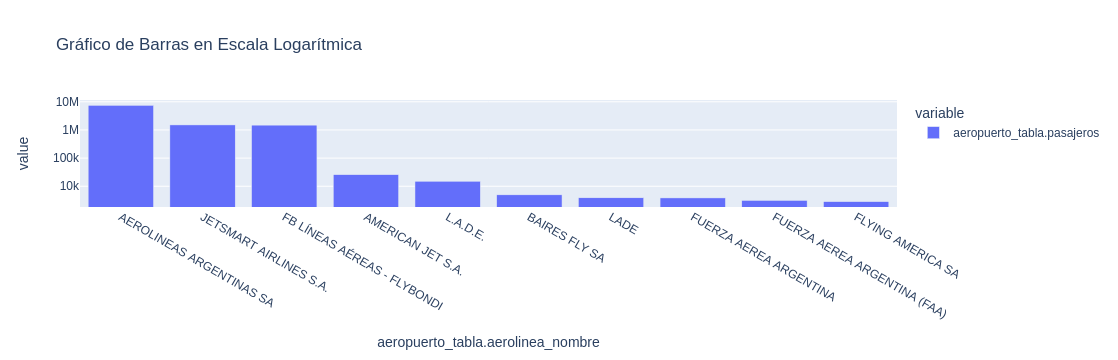

In [33]:
fig = px.bar(AgrupaDos, log_y=True, title='Gráfico de Barras en Escala Logarítmica')
fig.show()

In [73]:
# Punto 10:
# Cuales son las 10 aeronaves más utilizadas entre el 01/01/2021 y el 30/06/22 que despegaron desde la 
# Ciudad autónoma de Buenos Aires o de Buenos Aires, exceptuando aquellas aeronaves que no cuentan con nombre.

query = """
    select 
	at2.aeronave ,
	at2.aeropuerto ,
	adt.provincia as lugar_despegue,
	at2.origen_destino ,
	pasajeros
from aterrizajes_despegues.aeropuerto_tabla at2 
left join aterrizajes_despegues.aeropuerto_detalles_tabla adt on at2.aeropuerto = adt.aeropuerto 
where adt.provincia in ("BUENOS AIRES", "CIUDAD AUTÓNOMA DE BUENOS AIRES") and at2.fecha BETWEEN '2021-01-01' and '2022-06-30'"""
cursor.execute(query)


In [74]:
# Obtener los resultados
results = cursor.fetchall()

# Tenemos otra forma de obtener la información para analizarla
column_names = [desc[0] for desc in cursor.description]
df2 = pd.DataFrame(results, columns=column_names)

In [75]:
df2.head(10)

,at2.aeronave,at2.aeropuerto,lugar_despegue,at2.origen_destino,pasajeros
0,BO-B737-8MB,EZE,BUENOS AIRES,GRA,70
1,BO-737-800,EZE,BUENOS AIRES,ECA,70
2,BO-B-737-76N,EZE,BUENOS AIRES,SAL,12
3,EMB-ERJ190100IGW,EZE,BUENOS AIRES,TUC,26
4,BO-B737-800,EZE,BUENOS AIRES,ECA,35
5,EMB-ERJ190100IGW,EZE,BUENOS AIRES,JUJ,46
6,BO-737-800,EZE,BUENOS AIRES,BAR,81
7,BO-B737-8MB,EZE,BUENOS AIRES,USU,74
8,BO-B737-800,EZE,BUENOS AIRES,NEU,67
9,BO-737-8SH,EZE,BUENOS AIRES,USU,71


In [76]:
df2['lugar_despegue'].unique()

array(['BUENOS AIRES', 'CIUDAD AUTÓNOMA DE BUENOS AIRES'], dtype=object)

In [77]:
df2['at2.aeronave'].isnull().sum()

0

In [85]:
# Realizamos la agrupación
AgrupaAero = df2[df2['at2.aeronave'] != '0'].groupby('at2.aeronave')['pasajeros'].sum()
AgrupaAero = AgrupaAero.sort_values(ascending=False).head(10)
AgrupaAero

at2.aeronave
EMB-ERJ190100IGW    877446
AIB-A320-232        677941
BO-737-800          592813
BO-B737-800         340073
BO-737-8Q8          287071
BO-737-8            256945
BO-737-8SH          203337
BO-737-86J          177034
BO-737-8HX          169802
BO-B737-8SH         167344
Name: pasajeros, dtype: int64

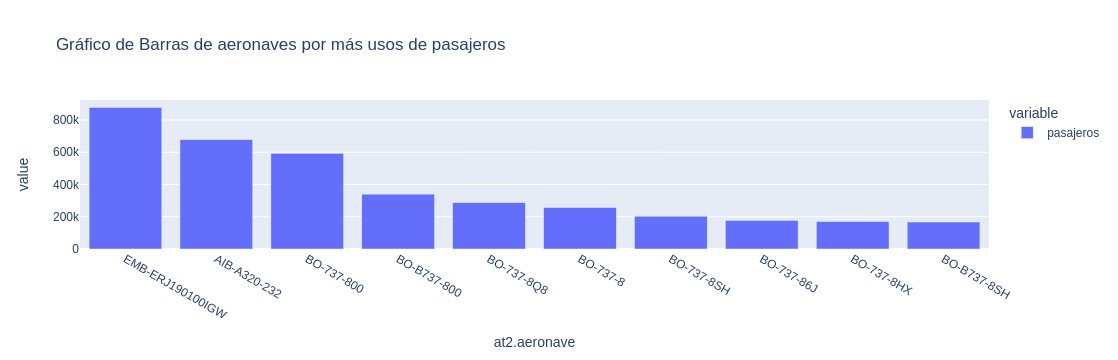

In [86]:
fig2 = px.bar(AgrupaAero,  title='Gráfico de Barras de aeronaves por más usos de pasajeros')
fig2.show()

In [87]:
# Realizamos la agrupación
AgrupaAerodos = df2[df2['at2.aeronave'] != '0'].groupby('at2.aeronave').size()
AgrupaAerodos = AgrupaAerodos.sort_values(ascending=False).head(10)
AgrupaAerodos

at2.aeronave
EMB-ERJ190100IGW    24624
CE-150-L            16047
CE-152              15846
CE-150-M            12004
AIB-A320-232        10505
BO-737-800           8927
CE-150-J             5974
CE-150-G             5655
BO-B737-800          5404
PA-PA-28-181         4890
dtype: int64

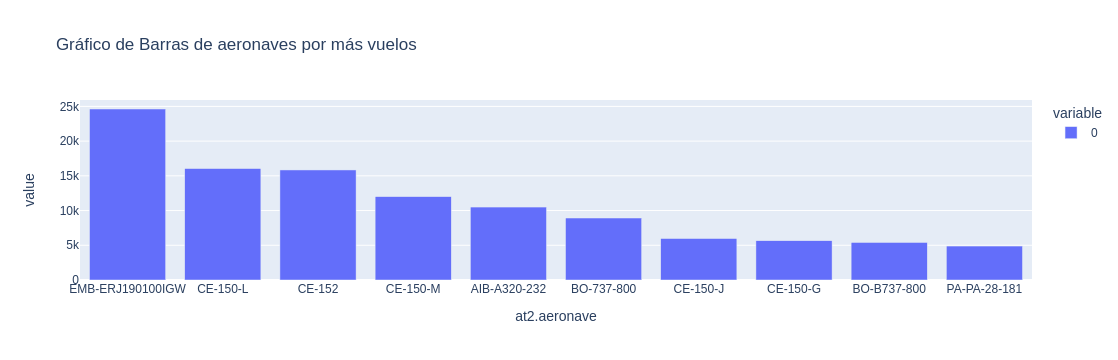

In [88]:
fig = px.bar(AgrupaAerodos,  title='Gráfico de Barras de aeronaves por más vuelos')
fig.show()

In [30]:
# Cerrar el cursor y la conexión
cursor.close()
connection.close()